##### Problem 36

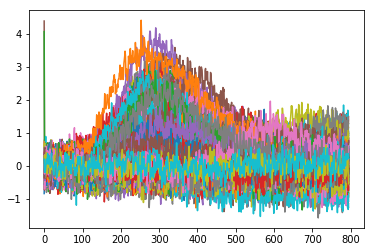

In [63]:
import scipy.io
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
#data = scipy.io.loadmat("rodcurrents.mat")
#print(data)
#for i in data:
#    if '__' not in i and 'readme' not in i:
#        np.savetxt(("rodcurrents.csv"),data[i],delimiter=',')
data = np.genfromtxt("rodcurrents.csv",delimiter=',')
plt.clf()
a = plt.plot(data[:,:].T)

## Let's slice the data 100 to 500 (10 to 50ms)

In [64]:
data=data[:,100:500]

## Let's smooth the responses

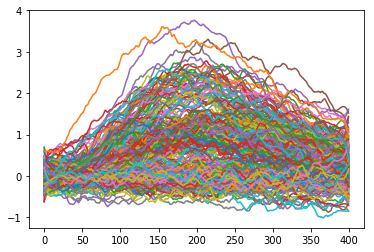

In [65]:
smoothed_data = savgol_filter(data, 31,3)
plt.clf()
a = plt.plot(smoothed_data[:,:].T)

## We see peaks for 0, 1 , 2 photons but they're shifted by .25 pA compared to Fig 2.4, likely from differences in smoothing
## Smoothed data, reproducing Fig 2.4

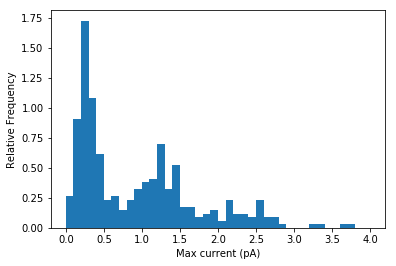

In [5]:
max_currents = np.amax(smoothed_data,axis=1)
max_current_time = np.argmax(smoothed_data,axis=1)
plt.clf()
a = plt.hist(max_currents,bins=40, range=(0,4), normed=True)
plt.xlabel("Max current (pA)")
plt.ylabel("Relative Frequency")

## Unsmoothed data

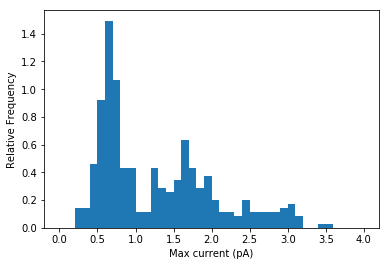

In [68]:
max_currents = np.amax(data,axis=1)
max_current_time = np.argmax(data,axis=1)
plt.clf()
a = plt.hist(max_currents,bins=40, range=(0,4), normed=True)
plt.xlabel("Max current (pA)")
plt.ylabel("Relative Frequency")

## Get Average Single-photon response: Responses with 0.7 pA < I < 1.8 pA

(158, 1)
(158, 400)


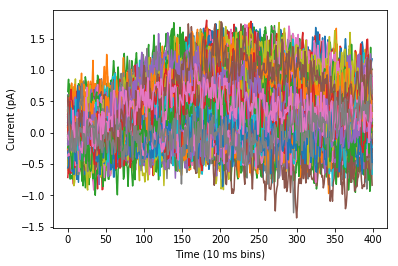

In [67]:

ind_sp = np.argwhere((max_currents>0.7) & (max_currents<1.8))
print(ind_sp.shape)
single_photons = data[ind_sp.ravel(),:]
print(single_photons.shape)
plt.plot(single_photons.T)
plt.xlabel("Time (10 ms bins)")
plt.ylabel("Current (pA)")
avg_photon = np.mean(single_photons, axis=0)


## Average Single Photon Template

130.15237279152268

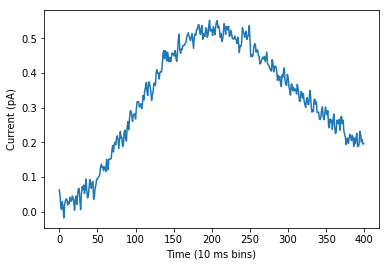

In [66]:
plt.plot(avg_photon.T)
plt.xlabel("Time (10 ms bins)")
plt.ylabel("Current (pA)")
np.sum(avg_photon)

## Dot product of array into template

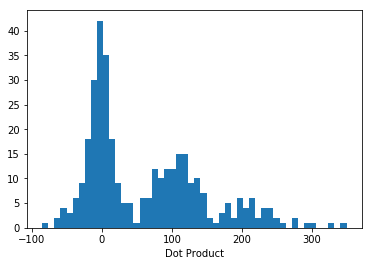

In [48]:
def apply_filter(array, filt):
    return np.array([np.dot(k,filt) for k in array]) #normalized dot product
    #return np.array([np.dot(k,filt)/(np.dot(k,k)**.5*np.dot(filt,filt)**.5)**0 for k in array]) #normalized dot product
result = apply_filter(data,avg_photon)
a = plt.hist(result,bins=50)
plt.xlabel("Dot Product")

## The spikes at 0, 100, 200 correspond with 0, 1, 2 photon responses and look reasonable. The average single photon template is a good baseline.  

## What about just filtering bins 150-250?

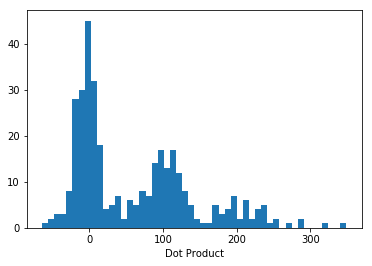

In [47]:
filt = np.hstack( (np.hstack( (np.zeros(150),np.ones(100)) ) ,np.zeros(150)) )
result = apply_filter(data,filt)
a = plt.hist(result,bins=50)
plt.xlabel("Dot Product")

## Doesn't look as good, especially the 2-photon response

## Try just 250-400 bins of average photon response

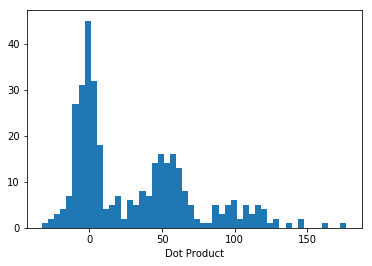

In [46]:
filt = np.hstack( (np.hstack( (np.zeros(150),avg_photon[150:250]) ) ,np.zeros(150)) )
result = apply_filter(data,filt)
a = plt.hist(result,bins=50)
plt.xlabel("Dot Product")

## It's hard to do better than the average single photon template!